In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy.stats import friedmanchisquare
import scikit_posthocs
from evaluate_complete_deoxy import *

In [20]:
# perf = joblib.load("performance_excels/deoxy/deoxy_performance_dict_base_onehot_multiclass.joblib")
perf = joblib.load("performance_excels/deoxy/deoxy_performance_dict_base_onehot.joblib")
perf_df = pd.DataFrame(perf)

perf_df_by_sf = [perf_df.iloc[[x for x in range(perf_df.shape[0]) if x%5==i], :] for i in range(5)]
for i in range(5):
    print(f"Sulfonyl fluoride {i+1}")
    for model in perf_df["model"].unique() :
        sub_df = perf_df_by_sf[i]
        print(model, round(sub_df[sub_df["model"] == model]["reciprocal_rank"].mean(), 3))
    print()


Sulfonyl fluoride 1
baseline 0.422
RPC 0.831
IBM 0.776
IBPL 0.776
LRRF 0.831
LRT 0.831
rfr 0.646

Sulfonyl fluoride 2
baseline 0.357
RPC 0.753
IBM 0.422
IBPL 0.445
LRRF 0.753
LRT 0.753
rfr 0.495

Sulfonyl fluoride 3
baseline 0.661
RPC 0.682
IBM 0.682
IBPL 0.682
LRRF 0.706
LRT 0.682
rfr 0.638

Sulfonyl fluoride 4
baseline 0.505
RPC 0.596
IBM 0.672
IBPL 0.672
LRRF 0.648
LRT 0.672
rfr 0.562

Sulfonyl fluoride 5
baseline 0.602
RPC 0.734
IBM 0.734
IBPL 0.734
LRRF 0.734
LRT 0.734
rfr 0.701



In [10]:
perf = joblib.load("performance_excels/deoxy_performance_dict_base_fp.joblib")
perf_df = pd.DataFrame(perf)

perf_df_by_sf = [perf_df.iloc[[x for x in range(perf_df.shape[0]) if x%5==i], :] for i in range(5)]


In [11]:
for i in range(5):
    print(f"Sulfonyl fluoride {i+1}")
    for model in perf_df["model"].unique() :
        sub_df = perf_df_by_sf[i]
        print(model, round(sub_df[sub_df["model"] == model]["reciprocal_rank"].mean(), 3))
    print()

Sulfonyl fluoride 1
baseline 0.422
RPC 0.523
IBM 0.654
IBPL 0.544
LRRF 0.831
LRT 0.846
rfr 0.615

Sulfonyl fluoride 2
baseline 0.357
RPC 0.753
IBM 0.495
IBPL 0.534
LRRF 0.753
LRT 0.685
rfr 0.547

Sulfonyl fluoride 3
baseline 0.661
RPC 0.549
IBM 0.451
IBPL 0.437
LRRF 0.391
LRT 0.641
rfr 0.641

Sulfonyl fluoride 4
baseline 0.505
RPC 0.562
IBM 0.435
IBPL 0.5
LRRF 0.388
LRT 0.677
rfr 0.698

Sulfonyl fluoride 5
baseline 0.602
RPC 0.661
IBM 0.539
IBPL 0.484
LRRF 0.734
LRT 0.781
rfr 0.667



In [5]:
perf = joblib.load("performance_excels/deoxy_performance_dict_both_desc.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRT"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values

print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.8231534090909092
RPC 0.7548115079365079
IBM 0.6449032738095237
IBPL 0.5928199404761905
LRRF 0.6692708333333333
LRT 0.7492559523809523
rfr 0.7140562996031746

baseline 0.3937225548404685
RPC 0.5218501702536795
IBM 0.2425911553633965
IBPL 0.23998126943347037
LRRF 0.2959613833167991
LRT 0.3947883095628495
rfr 0.41315789473684217
11 32
13 32


In [6]:
perf = joblib.load("performance_excels/deoxy_performance_dict_both_fp.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRT"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values

print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.8231534090909092
RPC 0.7563244047619048
IBM 0.686061507936508
IBPL 0.6825129731379731
LRRF 0.6042906746031746
LRT 0.7492559523809523
rfr 0.6924355158730159

baseline 0.3937225548404685
RPC 0.46509794433443036
IBM 0.3166668251662633
IBPL 0.26817766975626933
LRRF 0.30469479003088396
LRT 0.3947883095628495
rfr 0.37532894736842104
10 32
14 32


In [42]:
a = np.array(
    [1.0, 0.5, 1.0, 0.5, 0.25, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.125, 1.0, 1.0, 0.1111111111111111, 1.0, 1.0, 0.14285714285714285, 0.07692307692307693, 1.0, 1.0, 1.0, 1.0, 1.0, 0.14285714285714285, 1.0, 0.3333333333333333]
)
np.mean(a)

0.7661067231379731

In [19]:
p_df = pd.DataFrame(joblib.load("performance_excels/deoxy_performance_dict_both_fp_precision.joblib"))
np.mean(p_df[p_df["model"]=="PrecisionOpt"]["kendall_tau"].values)

0.3466677175322753

In [42]:
perf = joblib.load("performance_excels/deoxy_performance_dict_both_desc.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRT"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values

print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.8231534090909092
RPC 0.6861742424242424
BoostRPC 0.1341661376817627
IBM 0.5600818452380952
IBPL 0.51796875
LRRF 0.7010551948051948
LRT 0.7492559523809523
BoostLRT 0.11769549894549894
rfr 0.7140562996031746

baseline 0.3937225548404685
RPC 0.3682708478957354
BoostRPC -0.3742604355471656
IBM 0.3044204799928655
IBPL 0.23364141665263524
LRRF 0.36511842763487357
LRT 0.3947883095628495
BoostLRT -0.4007598105362346
rfr 0.41315789473684217
11 32
13 32


In [41]:
perf = joblib.load("performance_excels/deoxy_performance_dict_both_fp.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRRF"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values
print(sum(lrrf_rr >= rfr_rr), len(lrrf_rr))

baseline 0.8231534090909092
RPC 0.6861742424242424
IBM 0.6538070436507937
IBPL 0.7205729166666667
LRRF 0.7010551948051948
LRT 0.7492559523809523
rfr 0.6924355158730159

baseline 0.3937225548404685
RPC 0.36892874263257747
IBM 0.30090563978414286
IBPL 0.24895686724609356
LRRF 0.36511842763487357
LRT 0.3947883095628495
rfr 0.37532894736842104
23 32


In [43]:
#TODO
perf = joblib.load("performance_excels/deoxy_performance_dict_both_onehot.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRRF"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values
print(sum(lrrf_rr >= rfr_rr), len(lrrf_rr))


0 0


In [20]:
# fig, ax = plt.subplots(ncols=2, figsize=(12,6))
perf = joblib.load("performance_excels/deoxy_performance_dict_base_desc.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRRF"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values
print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.509375
RPC 0.6067708333333333
IBM 0.5015625
IBPL 0.4463541666666667
LRRF 0.7265625
LRT 0.6557291666666666
rfr 0.5807291666666666

baseline 0.1305793193816164
RPC 0.17148007132581644
IBM 0.013138402495312654
IBPL 0.024648552018617848
LRRF 0.40885853031859287
LRT 0.3196312574999723
rfr 0.3964292135596641
69 160
56 160


In [35]:
n_models = len(perf_df["model"].unique())
perf_by_sulfonyl_fluoride = [np.zeros((32,n_models)), np.zeros((32,n_models)), np.zeros((32,n_models)), np.zeros((32,n_models)), np.zeros((32,n_models))]

for j, model in enumerate(perf_df["model"].unique()) :
    print(model)
    sub_df = perf_df[perf_df["model"]==model][["test_compound", "reciprocal_rank"]]
    perf_vals = sub_df["reciprocal_rank"].values.reshape(32,5)
    for i in range(5) :
        perf_by_sulfonyl_fluoride[i][:,j] = perf_vals[:,i]

baseline
RPC
IBM
IBPL
LRRF
LRT
rfr


In [34]:
for array in perf_by_sulfonyl_fluoride :
    print(np.mean(array, axis=0))
    print()

[0.421875   0.61197917 0.47395833 0.27864583 0.81510417 0.765625
 0.59895833]

[0.35677083 0.75260417 0.421875   0.49479167 0.74739583 0.80729167
 0.56770833]

[0.66145833 0.52083333 0.65104167 0.51822917 0.65364583 0.56770833
 0.52604167]

[0.50520833 0.484375   0.53125    0.48697917 0.69270833 0.54427083
 0.52864583]

[0.6015625  0.6640625  0.4296875  0.453125   0.72395833 0.59375
 0.68229167]



In [39]:
precision_df = pd.DataFrame(joblib.load("performance_excels/deoxy_performance_dict_base_fp_precision.joblib"))
precision_array = precision_df["reciprocal_rank"].values.reshape(32,5)
np.mean(precision_array, axis=0)

array([0.5625    , 0.703125  , 0.484375  , 0.640625  , 0.65885417])

In [46]:
# fig, ax = plt.subplots(ncols=2, figsize=(12,6))
perf = joblib.load("performance_excels/deoxy_performance_dict_base_fp.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())

lrrf_rr = perf_df[perf_df["model"] == "LRT"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values
print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.509375
RPC 0.6098958333333334
IBM 0.5145833333333333
IBPL 0.5
LRRF 0.6192708333333333
LRT 0.7260416666666666
rfr 0.6333333333333333

baseline 0.1305793193816164
RPC 0.2027670152246771
IBM -0.0010279692298041352
IBPL -0.01104196643661246
LRRF 0.20691938974298557
LRT 0.3593208341015309
rfr 0.35471823016070114
63 160
52 160


In [49]:
perf = joblib.load("performance_excels/deoxy_performance_dict_sulfonyl_fluoride_desc.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())
print()
lrrf_rr = perf_df[perf_df["model"] == "LRRF"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values
print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.705078125
RPC 0.694921875
IBM 0.705078125
IBPL 0.705078125
LRRF 0.7
LRT 0.6618489583333333
rfr 0.6682291666666667

baseline 0.47375168898584674
RPC 0.5133727925319449
IBM -0.024151755758702424
IBPL 0.5118102925319449
LRRF 0.5149352925319448
LRT 0.41013448189365065
rfr 0.3906199349152649

29 128
82 128


In [53]:
perf = joblib.load("performance_excels/deoxy_performance_dict_sulfonyl_fluoride_fp.joblib")
perf_df = pd.DataFrame(perf)
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["reciprocal_rank"].mean())
print()
for model in perf_df["model"].unique() :
    print(model, perf_df[perf_df["model"] == model]["kendall_tau"].mean())
print()
lrrf_rr = perf_df[perf_df["model"] == "RPC"]["reciprocal_rank"].values
rfr_rr = perf_df[perf_df["model"] == "rfr"]["reciprocal_rank"].values
print(sum(lrrf_rr > rfr_rr), len(lrrf_rr))
print(sum(lrrf_rr == rfr_rr), len(lrrf_rr))

baseline 0.705078125
RPC 0.762890625
IBM 0.6334635416666667
IBPL 0.6334635416666667
LRRF 0.705078125
LRT 0.7424479166666667
rfr 0.7127604166666667

baseline 0.47375168898584674
RPC 0.5383727925319448
IBM 0.2356415995816768
IBPL 0.2525755407376637
LRRF 0.5071227925319448
LRT 0.47578827291727377
rfr 0.4298326497565047

20 128
98 128


## Attempt to combine ranking base & ranking sulfonyl fluorides

In [9]:
X, y = load_data("desc", "yield", "both")
X_sf, y_sf = load_data("desc", "ranking", "sulfonyl_fluoride")
X_base, y_base = load_data("desc", "ranking", "base")
X_both, y_both = load_data("desc", "ranking", "both")
print(X_sf.shape, y_sf.shape, X_base.shape, y_base.shape, X_both.shape, y_both.shape)

for i in range(32) :
    # ranking sulfonyl fluorides first
    test_inds = [x for x in range(4*i, 4*i+4)]
    train_inds = [x for x in range(X_sf.shape[0]) if x not in test_inds]

    X_train_sf, X_test_sf = X_sf[train_inds, :], X_sf[test_inds,:]
    y_train_sf, y_test_sf = y_sf[train_inds, :], y_sf[test_inds,:]
    std = StandardScaler()
    X_train_sf_std = std.fit_transform(X_train_sf)
    X_test_sf_std = std.transform(X_test_sf)

    rpc_lr = DecisionTreeLabelRanker(
                random_state=42, min_samples_split=y_train_sf.shape[1] * 2
            )
    rpc_lr.fit(X_train_sf_std, y_train_sf)
    rpc_pred_rank_sf = rpc_lr.predict(X_test_sf_std)

    # Ranking bases
    test_inds = [x for x in range(5*i, 5*i+5)]
    train_inds = [x for x in range(X_base.shape[0]) if x not in test_inds]

    X_train_base, X_test_base = X_base[train_inds, :], X_base[test_inds,:]
    y_train_base, y_test_base = y_base[train_inds, :], y_base[test_inds,:]
    std = StandardScaler()
    X_train_base_std = std.fit_transform(X_train_base)
    X_test_base_std = std.transform(X_test_base)
    rpc_lr.fit(X_train_base_std, y_train_base)
    rpc_pred_rank_base = rpc_lr.predict(X_test_base_std)
    # print(rpc_pred_rank_base.shape)

    total_pred = np.multiply(rpc_pred_rank_sf, rpc_pred_rank_base.T).flatten()
    # print(total_pred)
    total_pred_rank = yield_to_ranking(-1 * total_pred)
    # print(total_pred_rank)

    # predicting both at once
    train_inds = [x for x in range(32) if x!=i]

    X_train_both, X_test_both = X_both[train_inds, :], X_both[i,:]
    y_train_both, y_test_both = y_both[train_inds, :], y_both[i,:]
    std = StandardScaler()
    X_train_both_std = std.fit_transform(X_train_both)
    X_test_both_std = std.transform(X_test_both.reshape(1,-1))
    rpc_lr.fit(X_train_both_std, y_train_both)
    rpc_pred_rank_both = rpc_lr.predict(X_test_both_std)

    # actual yields
    y_test = y[20*i:20*(i+1)]
    actual_rank = yield_to_ranking(y_test)

    # Comparing
    print(f"Test compound {i}")
    print("  Kendall Tau")
    print(f"   Combined: {kendalltau(actual_rank, total_pred_rank).statistic}")
    print(f"   At once: {kendalltau(actual_rank, rpc_pred_rank_both).statistic}")
    print("  Reciprocal Rank")
    total_inds = np.argpartition(total_pred_rank.flatten(), 4)[:4]
    total_rr = 1/np.min(actual_rank[total_inds])
    once_inds = np.argpartition(rpc_pred_rank_both.flatten(), 4)[:4]
    once_rr = 1/np.min(actual_rank[once_inds])
    print(f"   Combined: {total_rr}")
    print(f"   At once: {once_rr}")
    print()

(128, 20) (128, 5) (160, 22) (160, 4) (32, 19) (32, 20)
Test compound 0
  Kendall Tau
   Combined: 0.39999999999999997
   At once: 0.7263157894736842
  Reciprocal Rank
   Combined: 1.0
   At once: 1.0

Test compound 1
  Kendall Tau
   Combined: 0.1368421052631579
   At once: 0.3157894736842105
  Reciprocal Rank
   Combined: 0.3333333333333333
   At once: 0.25

Test compound 2
  Kendall Tau
   Combined: 0.4421052631578947
   At once: -0.031578947368421054
  Reciprocal Rank
   Combined: 0.5
   At once: 0.2

Test compound 3
  Kendall Tau
   Combined: 0.30526315789473685
   At once: 0.7473684210526316
  Reciprocal Rank
   Combined: 0.2
   At once: 0.5

Test compound 4
  Kendall Tau
   Combined: 0.031578947368421054
   At once: 0.3473684210526316
  Reciprocal Rank
   Combined: 0.16666666666666666
   At once: 0.25

Test compound 5
  Kendall Tau
   Combined: 0.1473684210526316
   At once: 0.17894736842105263
  Reciprocal Rank
   Combined: 0.5
   At once: 0.2

Test compound 6
  Kendall Tau
   

## Trying to see if sulfonyl fluoride choice is relatively obvious

In [11]:
yields = pd.read_csv("datasets/deoxyfluorination/observed_yields.csv", header=None).to_numpy().reshape(32,20)

<Axes: >

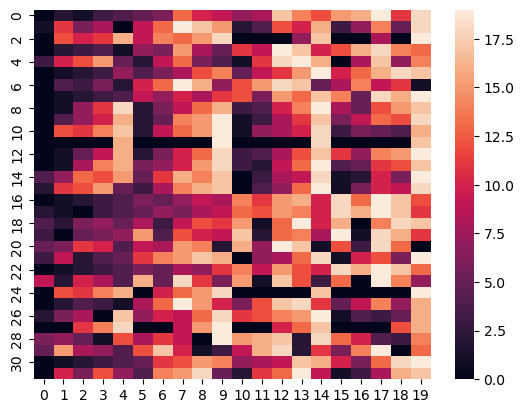

In [12]:
sns.heatmap(20-yield_to_ranking(yields))

In [13]:
np.mean(yields, axis=0)

array([20.8125 , 26.1875 , 27.5625 , 29.78125, 39.15625, 31.875  ,
       33.34375, 39.     , 37.9375 , 49.5625 , 34.09375, 34.0625 ,
       42.46875, 41.9375 , 51.78125, 36.15625, 34.59375, 44.15625,
       39.9375 , 53.34375])

In [14]:
np.sum(yield_to_ranking(yields) == 1, axis=0)

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 5, 0, 0, 2, 3, 5, 1, 0, 6, 0, 7])

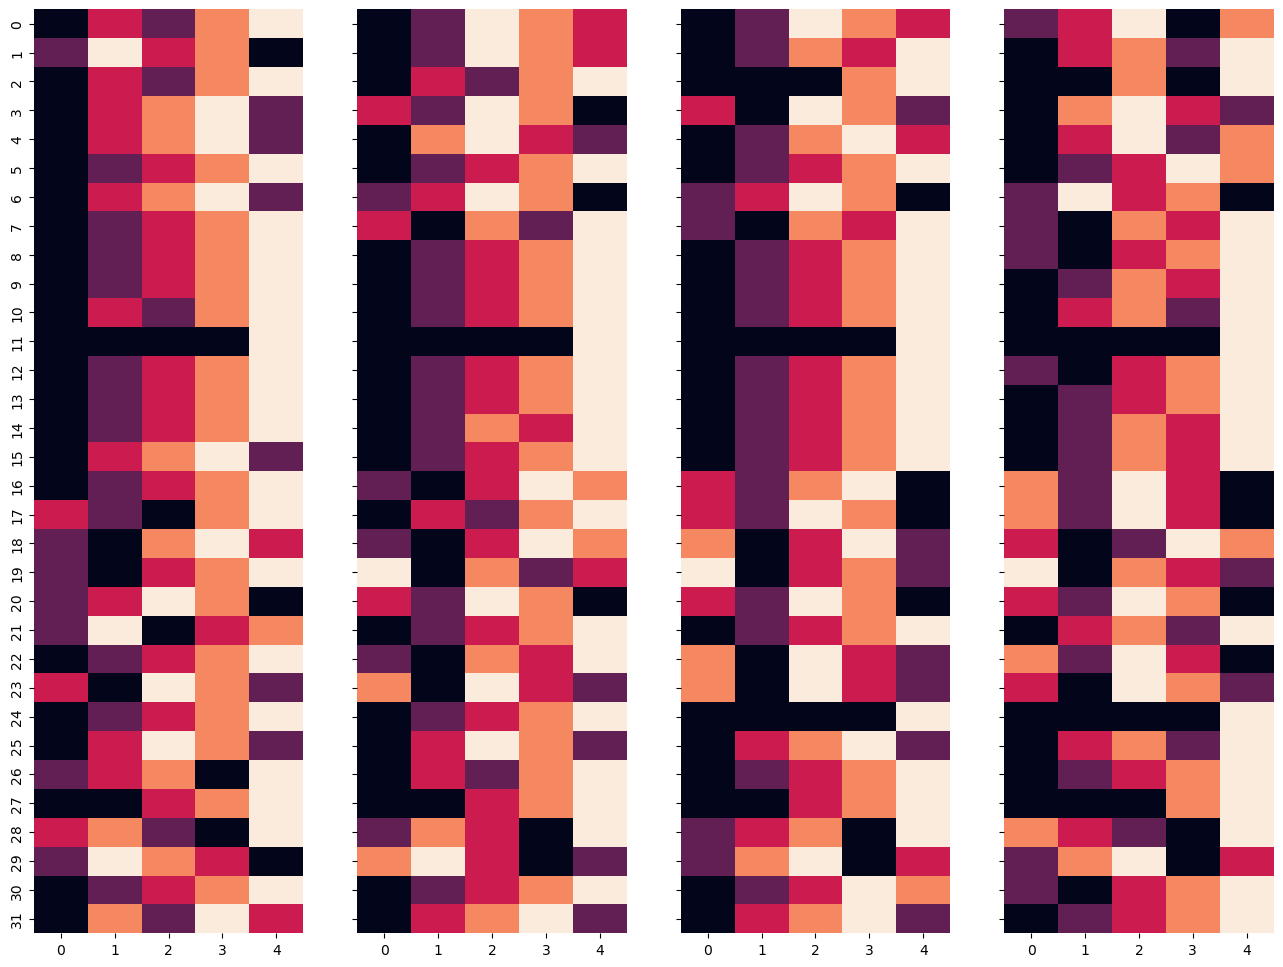

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(16,12), sharey=True)

rank_freqs = []
for i in range(4) :
    sub_y = yield_to_ranking(yields[:, 5*i:5*(i+1)])
    sns.heatmap(5-sub_y, ax=ax[i], cbar=False)
    rank_freqs.append(np.sum(sub_y == 1, axis=0))

In [16]:
rank_freqs

[array([ 0,  3,  3,  6, 20]),
 array([ 1,  1,  8,  3, 19]),
 array([ 1,  0,  8,  6, 17]),
 array([ 1,  1,  9,  2, 19])]

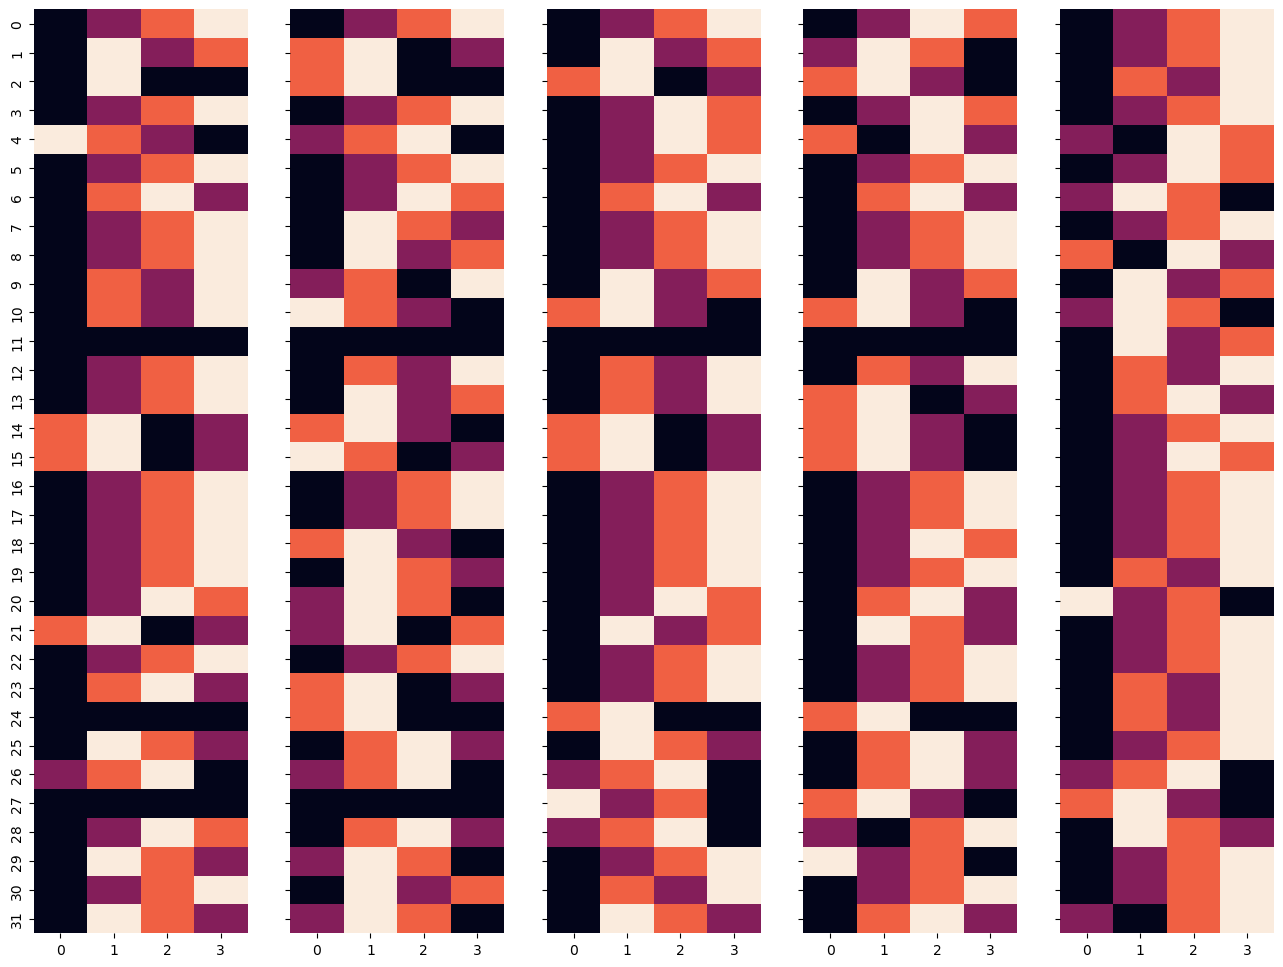

In [14]:
fig, ax = plt.subplots(ncols=5, figsize=(16,12), sharey=True)

cols_list = [[], [], [], [], []]
for i in range(20):
    cols_list[i%5].append(i)

rank_freqs = []
for i in range(5) :
    sub_y = yield_to_ranking(yields[:, cols_list[i]])
    sns.heatmap(4-sub_y, ax=ax[i], cbar=False)
    rank_freqs.append(np.sum(sub_y == 1, axis=0))

In [11]:
for i in range(5) :
    avg_y = np.mean(yields[:, cols_list[i]], axis=0)
    print(avg_y)

[20.8125  31.875   34.09375 36.15625]
[26.1875  33.34375 34.0625  34.59375]
[27.5625  39.      42.46875 44.15625]
[29.78125 37.9375  41.9375  39.9375 ]
[39.15625 49.5625  51.78125 53.34375]


In [15]:
rank_freqs

[array([ 1,  8,  5, 15]),
 array([ 2, 15,  5,  8]),
 array([ 1, 10,  6, 14]),
 array([ 1, 10,  9, 11]),
 array([ 1,  6,  6, 19])]